In [3]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from ydata_profiling import ProfileReport
from quickda.clean_data import *

# Leer archivo csv
df = pd.read_csv('./Datasets/bank_transactions.csv' , low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [4]:
# Eliminar filas con valores NaN
df = df.dropna()

# Codificando variables categoricas

# Genero
df['CustGender'] = df['CustGender'].replace({'M': 0, 'F': 1, 'T': 2})

# Ubicacion

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['CustLocation'] = le.fit_transform(df['CustLocation'])

# No nos importa la columna DOB ya que en nuestor caso no es necesario
df.drop('CustomerDOB', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustGender               1041614 non-null  int64  
 3   CustLocation             1041614 non-null  int32  
 4   CustAccountBalance       1041614 non-null  float64
 5   TransactionDate          1041614 non-null  object 
 6   TransactionTime          1041614 non-null  int64  
 7   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 67.5+ MB


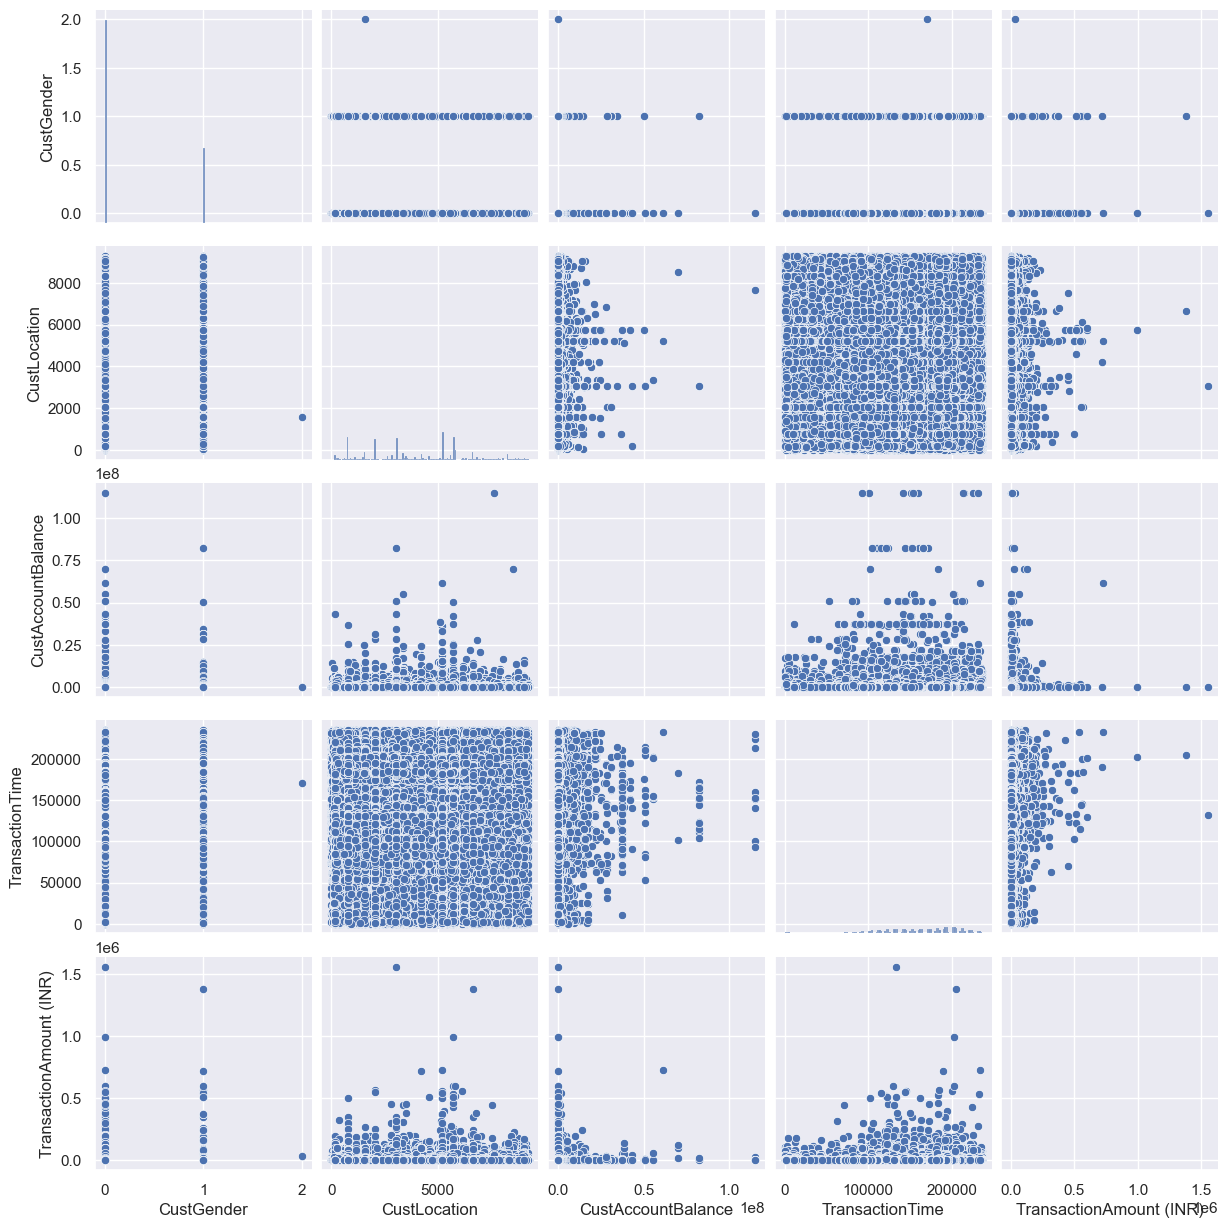

In [5]:
sns.pairplot(df)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15692\724105506.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

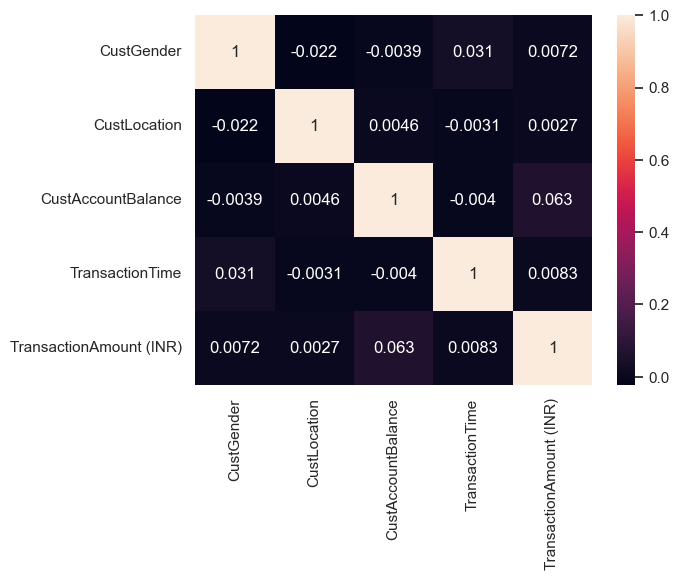

In [6]:
sns.heatmap(df.corr(), annot = True) 

<AxesSubplot: >

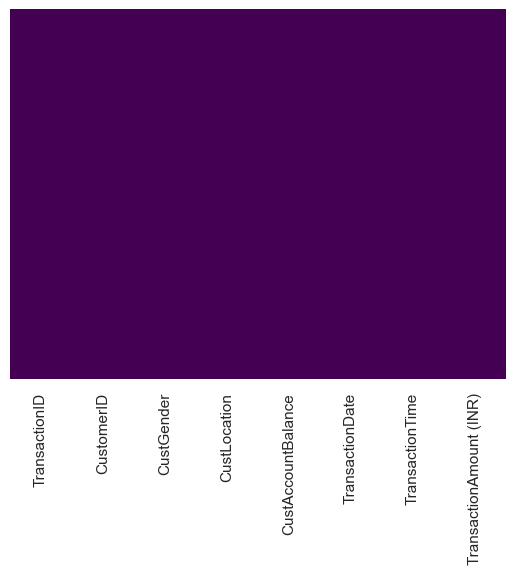

In [7]:
# Gráfico para ver si existen datos faltantes
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Outlier Analysis - Boxplot


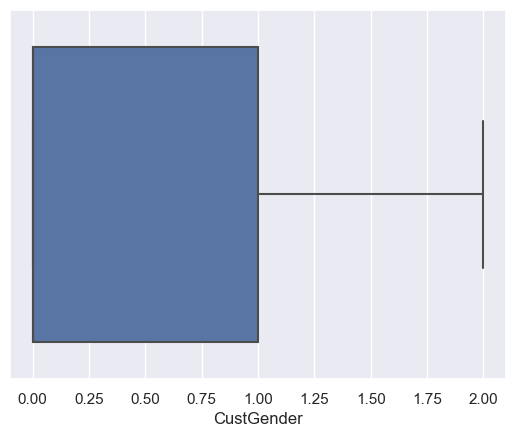

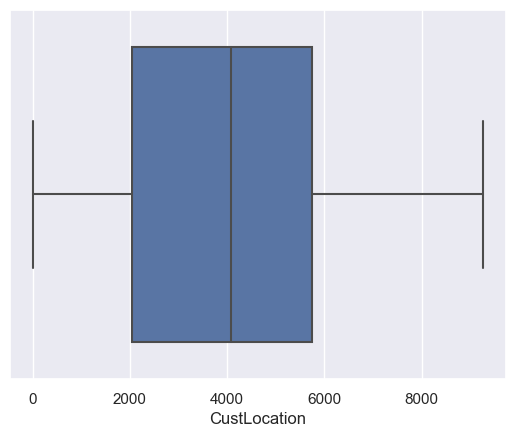

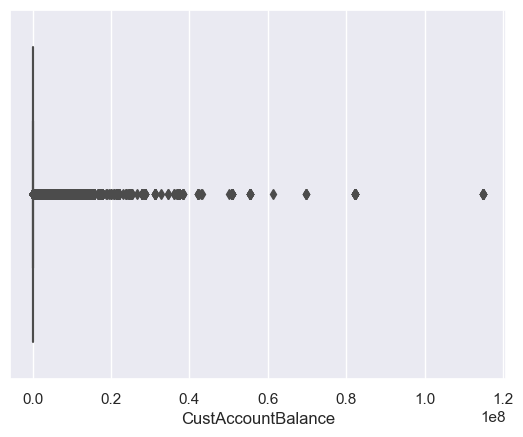

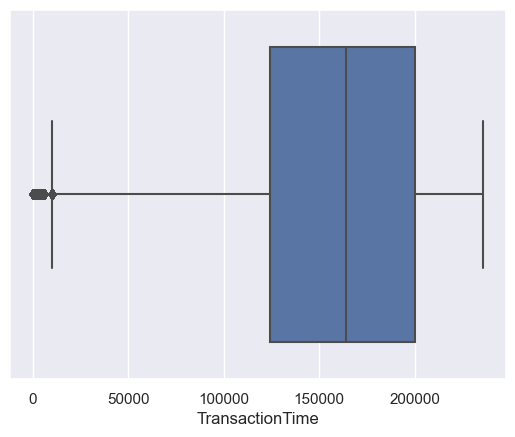

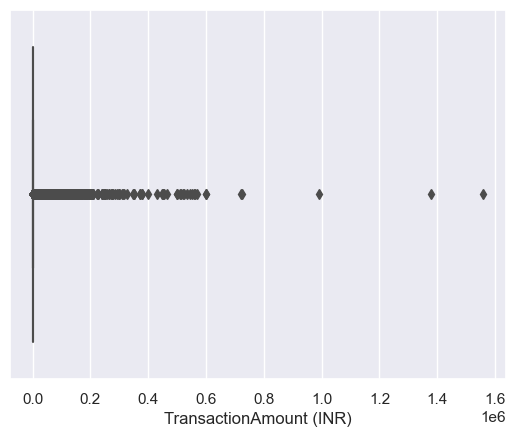

Distribution Analysis - Histogram


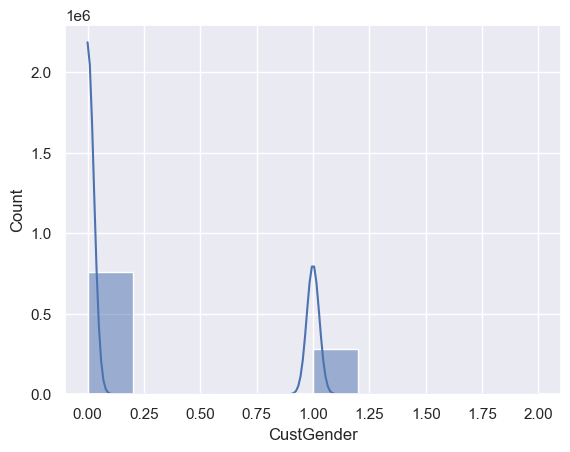

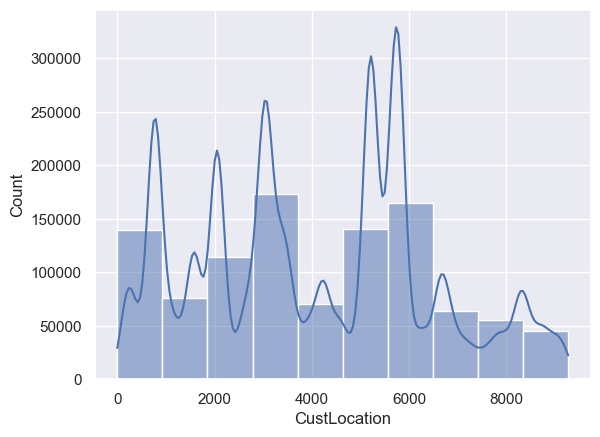

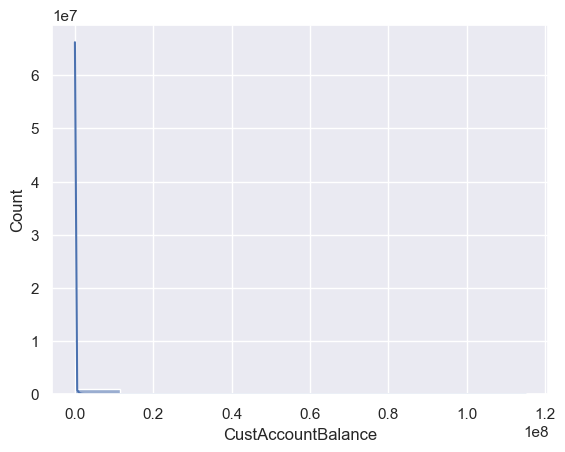

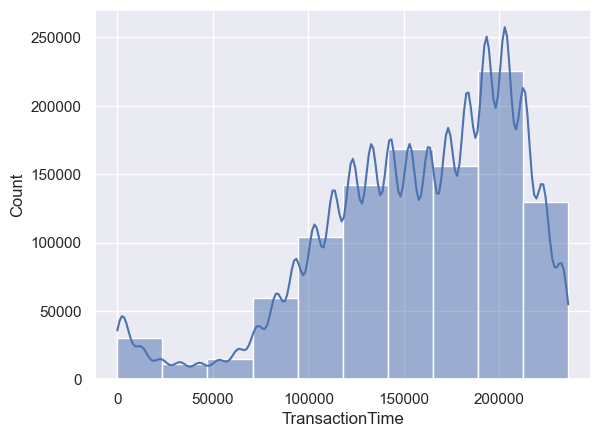

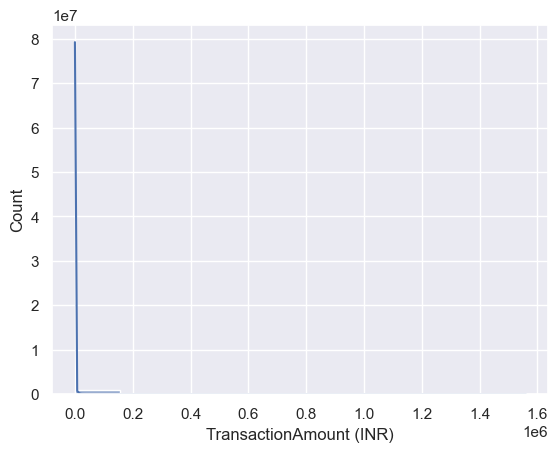

In [8]:
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
eda_num(df)

In [9]:
# calcular la matriz de correlación
corr_matrix = df.corr()

# calcular la media de los coeficientes de correlación para cada columna
corr_mean = corr_matrix.mean()

# mostrar los resultados
print(corr_mean.to_string())

CustGender                 0.202323
CustLocation               0.196375
CustAccountBalance         0.211872
TransactionTime            0.206370
TransactionAmount (INR)    0.216191


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15692\3105141879.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Principal Component Analysis

¿Qué es?
- Es un método de reducción de dimensiones que se utiliza en grandes conjuntos de datos para crear un grupo más pequeño que contenga la mayor parte del grupo original. Al hacer esto se cambia la precisión, de alguno modelo que trabaje con dichos datos, por la simplicidad ya que un conjunto más pequeño es más sencillo de procesar, visualizar y explorar.

- Sigue estos pasos:
    - Estandarización de datos
    - Cálcula de la matriz de covarianza
    - Identificación de componentes principales a través de vectores y valores de la matriz anterior
    - Procesar los vectores
    - Reformular los datos utilizando como base los componentes principales encontrados

                                    (A Step-By-Step Explanation of Principal Component Analysis (PCA), 2022)

¿Cómo podría ayudar a mejorar la calidad de nuestros clusters?
    
- Se reducirían las dimensiones del dataset porque talvez no cuente con muchas columnas pero si posee más del millón de columnas por lo que los procesos toman bastante tiempo para concluir
- Al determinar componentes principales los clusters se vuelven más distintos y se encuentran más separados debido a que se eliminan las características menos importantes.
- Se reduce el efecto que tiene la varianza en los datos ya que algunas características poseen más varianza que otras pero al calcular la matriz y manipular los vectores este efecto se disminuye considerablemente.